<a href="https://colab.research.google.com/github/mazak-patra/ALGO/blob/main/sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **selection sort**.
- ** -Algorithm
* Step 1: Read the number of elements for the list from the user.
* Step 2: Using for loop insert the elements in the list.
* Step 3: Initialize the minimum element as min=numbers[i].
* Step 4: Using the swap method the elements are sorted accordingly.
* Step 5: Print the sorted list.


--- Demonstrating Selection Sort with user input ---
Enter the number of elements for the list: 5
Enter 5 elements:
Element 1: 15
Element 2: 12
Element 3: 445
Element 4: 321
Element 5: 54
Original list: [15, 12, 445, 321, 54]
Sorted list (Selection Sort): [12, 15, 54, 321, 445]

--- Computing running time for various 'n' and plotting ---
Measuring performance...
n = 10: 0.0427 ms
n = 50: 0.5793 ms
n = 100: 2.0595 ms
n = 200: 7.5695 ms
n = 500: 61.7780 ms
n = 1000: 253.8212 ms
n = 2000: 1035.0621 ms


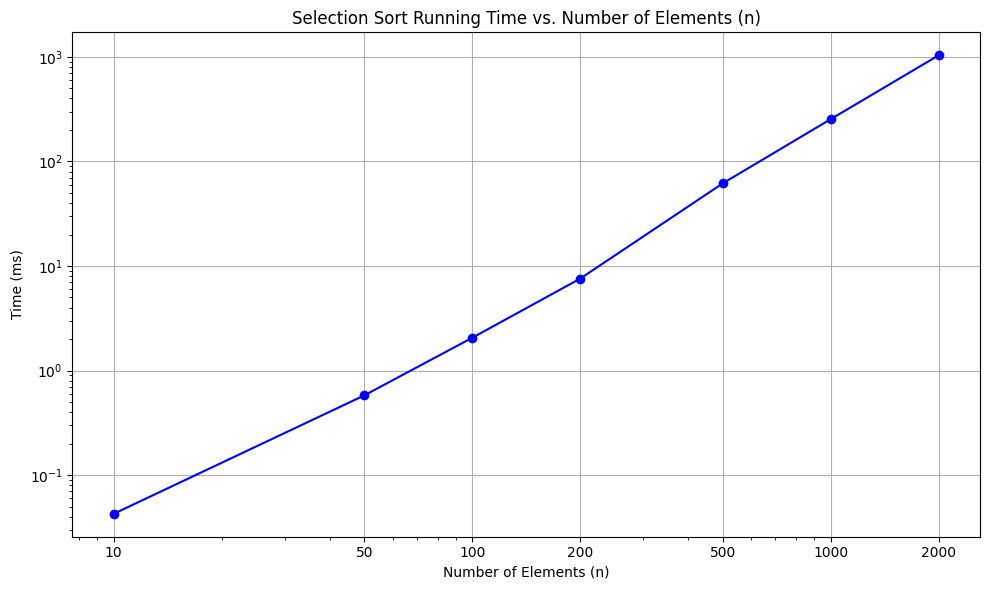

In [2]:
#write code for above cell and compute the running time and also plot graph.

import timeit
import matplotlib.pyplot as plt
import numpy as np

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i] # Swap the found minimum element with the first element
    return arr

# --- Code for user interaction, running time, and plotting ---

# Function to get user input for the list
def get_list_from_user():
    while True:
        try:
            num_elements = int(input("Enter the number of elements for the list: "))
            if num_elements <= 0:
                print("Please enter a positive number of elements.")
                continue
            break
        except ValueError:
            print("Invalid input. Please enter an integer.")

    numbers = []
    print(f"Enter {num_elements} elements:")
    for i in range(num_elements):
        while True:
            try:
                element = int(input(f"Element {i+1}: "))
                numbers.append(element)
                break
            except ValueError:
                print("Invalid input. Please enter an integer.")
    return numbers

# To avoid repeated user input during performance testing, we'll use a fixed list for that.
# For the initial demonstration, we'll ask for user input.

# --- Demonstrate Selection Sort with user input ---
print("\n--- Demonstrating Selection Sort with user input ---")
user_list = get_list_from_user()
print("Original list:", user_list)
sorted_user_list = selection_sort(list(user_list)) # Use a copy to avoid modifying original if needed later
print("Sorted list (Selection Sort):", sorted_user_list)

# --- Compute running time and plot graph for various 'n' ---
print("\n--- Computing running time for various 'n' and plotting ---")

# Generate different sizes of random lists for performance testing
def generate_random_list(size):
    return np.random.randint(0, 1000, size).tolist()

n_values = [10, 50, 100, 200, 500, 1000, 2000]
running_times = []

print("Measuring performance...")
for n in n_values:
    data = generate_random_list(n)
    # Measure execution time using timeit
    # Setup ensures the function and data are available in the measurement scope
    setup_code = "from __main__ import selection_sort, data"
    stmt = "selection_sort(list(data))"
    # Run the measurement multiple times and take the average for better accuracy
    time_taken = timeit.timeit(stmt, setup=setup_code, number=10)
    running_times.append(time_taken * 1000) # Convert to milliseconds
    print(f"n = {n}: {time_taken*1000:.4f} ms")

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(n_values, running_times, marker='o', linestyle='-', color='b')
plt.title('Selection Sort Running Time vs. Number of Elements (n)')
plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (ms)')
plt.grid(True)
plt.xscale('log') # Use log scale for n if range is large
plt.yscale('log') # Use log scale for time if range is large
plt.xticks(n_values, labels=[str(n) for n in n_values]) # Ensure ticks are readable
plt.tight_layout()
plt.show()


In computer science, **merge sort** (also commonly spelled mergesort) is an efficient, general-purpose, comparison-based sorting algorithm. Most implementations produce a stable sort, which means that the order of equal elements is the same in the input and output. Merge sort is a divide and conquer algorithm that was invented by John von Neumann in 1945.
Write a Python program to sort the elements using **merge sort** and plot a graph to the time taken versus n
- Algorithm(Merge Sort is a divide and conquer algorithm. It divides	input array in two halve.s, calls itself for the two halves and then merges two sorted halves.)
1.	Divide the unsorted array into n partitions, each	partition contains 1 element.
2.	Repeatedly merge partitioned units to produce	new sublists until there is only l sublist remaining. This will be the sorted	.
3.	Compare the first element of the sublist with the first element of the sublist to its right.
4.	Merge the two sublists by	paring each element of the sublist and placing the smaller element into the	new sublist.
5.	Repeat step 3 and 4 untill	all sublists are merged into a single sorted sublist.




--- Demonstrating Merge Sort with user input ---
Enter the number of elements for the list: 5
Enter 5 elements:
Element 1: 2134
Element 2: 2761
Element 3: 52671
Element 4: 26173
Element 5: 70721237
Original list: [2134, 2761, 52671, 26173, 70721237]
Sorted list (Merge Sort): [2134, 2761, 26173, 52671, 70721237]

--- Computing running time for various 'n' and plotting (Merge Sort) ---
Measuring performance for Merge Sort...
n = 10: 0.0996 ms
n = 50: 0.6001 ms
n = 100: 1.3720 ms
n = 200: 3.0677 ms
n = 500: 9.4083 ms
n = 1000: 19.1577 ms
n = 2000: 42.5519 ms
n = 5000: 128.0179 ms
n = 10000: 288.1872 ms


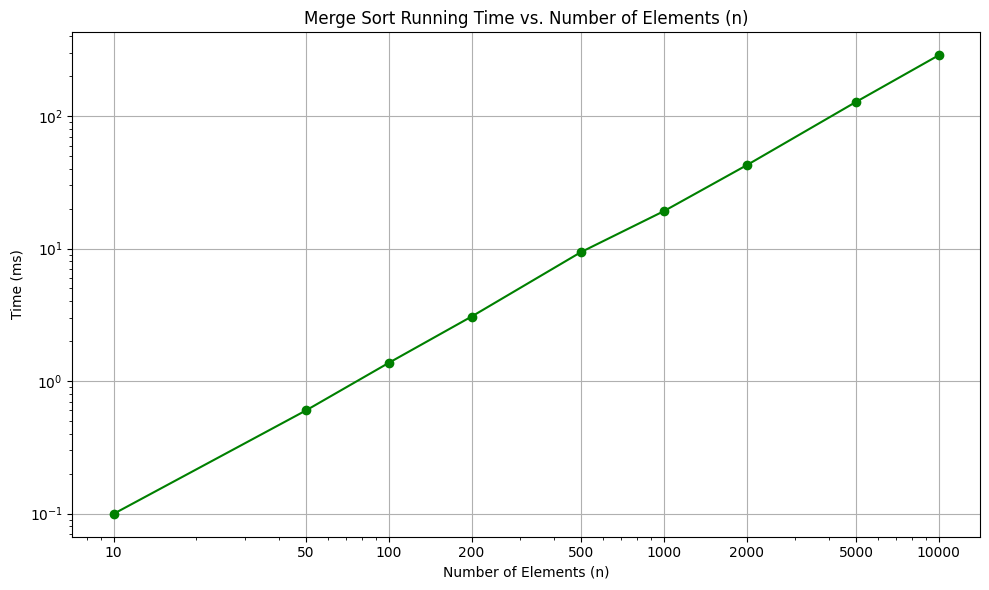

In [15]:
#write code for above cell and compute the running time and also plot graph.

import timeit
import matplotlib.pyplot as plt
import numpy as np

def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)

    return merge(left_half, right_half)

def merge(left, right):
    merged = []
    left_idx, right_idx = 0, 0

    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] < right[right_idx]:
            merged.append(left[left_idx])
            left_idx += 1
        else:
            merged.append(right[right_idx])
            right_idx += 1

    while left_idx < len(left):
        merged.append(left[left_idx])
        left_idx += 1

    while right_idx < len(right):
        merged.append(right[right_idx])
        right_idx += 1

    return merged


def get_list_from_user():
    while True:
        try:
            num_elements = int(input("Enter the number of elements for the list: "))
            if num_elements <= 0:
                print("Please enter a positive number of elements.")
                continue
            break
        except ValueError:
            print("Invalid input. Please enter an integer.")

    numbers = []
    print(f"Enter {num_elements} elements:")
    for i in range(num_elements):
        while True:
            try:
                element = int(input(f"Element {i+1}: "))
                numbers.append(element)
                break
            except ValueError:
                print("Invalid input. Please enter an integer.")
    return numbers

print("\n--- Demonstrating Merge Sort with user input ---")
user_list_merge = get_list_from_user()
print("Original list:", user_list_merge)
sorted_user_list_merge = merge_sort(list(user_list_merge))
print("Sorted list (Merge Sort):", sorted_user_list_merge)

print("\n--- Computing running time for various 'n' and plotting (Merge Sort) ---")

def generate_random_list(size):
    return np.random.randint(0, 1000, size).tolist()

n_values = [10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
running_times_merge = []

print("Measuring performance for Merge Sort...")
for n in n_values:
    data = generate_random_list(n)
    setup_code = "from __main__ import merge_sort, data"
    stmt = "merge_sort(list(data))"
    time_taken = timeit.timeit(stmt, setup=setup_code, number=10)
    running_times_merge.append(time_taken * 1000)
    print(f"n = {n}: {time_taken*1000:.4f} ms")


plt.figure(figsize=(10, 6))
plt.plot(n_values, running_times_merge, marker='o', linestyle='-', color='g')
plt.title('Merge Sort Running Time vs. Number of Elements (n)')
plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (ms)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xticks(n_values, labels=[str(n) for n in n_values])
plt.tight_layout()
plt.show()


**Quicksort** (sometimes called partition-exchange sort) is an efficient sorting algorithm. Developed by British computer scientist Tony Hoare in 1959 and published in 1961, it is still a commonly used algorithm for sorting.

Quicksort is a divide-and-conquer algorithm. It works by selecting a 'pivot' element from the array and partitioning the other elements into two sub-arrays, according to whether they are less than or greater than the pivot. The sub-arrays are then sorted recursively. This can be done in-place, requiring small additional amounts of memory to perform the sorting.
Write a Python program to sort the elements using quick sort and plot a graph to the time taken versus n.
- Algorithm
1.	Select a pivot element from the array.
2.	Partition the array into two sub-arrays. The elements in the first sub-array are less than the pivot element, while the elements in the second sub-array are greater than the pivot element.
3.	Recursively sort the sub-arrays created in Step 2.
4.	Join the sub-arrays and the pivot element together to	the sorted array.



--- Demonstrating Quick Sort with user input ---
Enter the number of elements for the list: 5
Enter 5 elements:
Element 1: 1365
Element 2: 486
Element 3: 3651
Element 4: 135
Element 5: 321
Original list: [1365, 486, 3651, 135, 321]
Sorted list (Quick Sort): [135, 321, 486, 1365, 3651]

--- Computing running time for various 'n' and plotting (Quick Sort) ---
Measuring performance for Quick Sort...
n = 10: 0.0777 ms
n = 50: 0.5307 ms
n = 100: 1.0859 ms
n = 200: 2.2664 ms
n = 500: 6.7771 ms
n = 1000: 12.7555 ms
n = 2000: 28.8875 ms
n = 5000: 68.3655 ms
n = 10000: 106.3564 ms


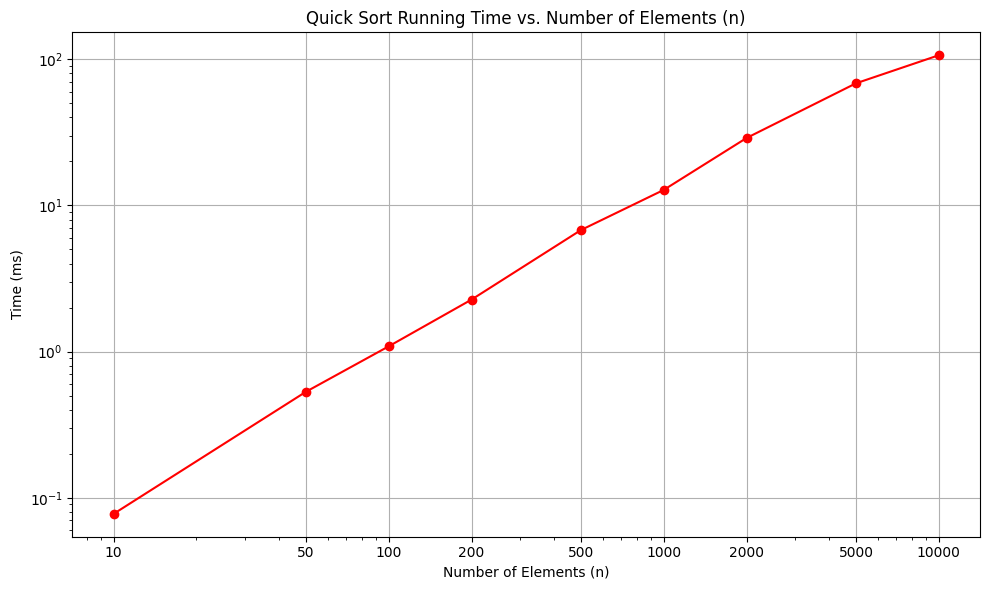

In [11]:

import timeit
import matplotlib.pyplot as plt
import numpy as np

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)


def get_list_from_user():
    while True:
        try:
            num_elements = int(input("Enter the number of elements for the list: "))
            if num_elements <= 0:
                print("Please enter a positive number of elements.")
                continue
            break
        except ValueError:
            print("Invalid input. Please enter an integer.")

    numbers = []
    print(f"Enter {num_elements} elements:")
    for i in range(num_elements):
        while True:
            try:
                element = int(input(f"Element {i+1}: "))
                numbers.append(element)
                break
            except ValueError:
                print("Invalid input. Please enter an integer.")
    return numbers


print("\n--- Demonstrating Quick Sort with user input ---")
user_list_quick = get_list_from_user()
print("Original list:", user_list_quick)
sorted_user_list_quick = quick_sort(list(user_list_quick)) # Use a copy
print("Sorted list (Quick Sort):", sorted_user_list_quick)


print("\n--- Computing running time for various 'n' and plotting (Quick Sort) ---")


def generate_random_list(size):
    return np.random.randint(0, 1000, size).tolist()

n_values = [10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
running_times_quick = []

print("Measuring performance for Quick Sort...")
for n in n_values:
    data = generate_random_list(n)
    setup_code = "from __main__ import quick_sort, data"
    stmt = "quick_sort(list(data))"
    time_taken = timeit.timeit(stmt, setup=setup_code, number=10)
    running_times_quick.append(time_taken * 1000) # Convert to milliseconds
    print(f"n = {n}: {time_taken*1000:.4f} ms")


plt.figure(figsize=(10, 6))
plt.plot(n_values, running_times_quick, marker='o', linestyle='-', color='r')
plt.title('Quick Sort Running Time vs. Number of Elements (n)')
plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (ms)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xticks(n_values, labels=[str(n) for n in n_values])
plt.tight_layout()
plt.show()
